In [2]:
""" import useful functions """

# Generic
import pandas as pd
import numpy as np
import scipy
import math

# Generate data sets
# from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
"""Import arrow-making package, update to make positions 3D"""
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

In [4]:
""" define useful functions """

#gives angle A of a triangle with sides a,b,c
def theta(a,b,c):
    A = math.acos((b**2 + c**2 - a**2)/(2*b*c))*180/np.pi
    return A

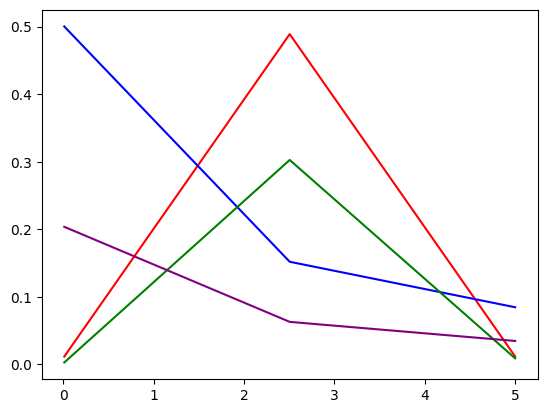

In [5]:
""" get mock data """

# find normalized distribution with some skew
def pdf(x):
    return 1/np.sqrt(2. * np.pi) * np.exp(- x**2 / 2.)

def cdf(x):
    return (1 + scipy.special.erf(x / np.sqrt(2.))) / 2.

# Returns gaussian+skew. e = mean, w = std dev, a = skew (larger a = broader right tail)
def skew(x,e,w,a):
    t = (x - e) / w
    return 2. / w * pdf(t) * cdf(a * t)

N_dim = 3
x = np.linspace(0.01 , 5.0 , int(N_dim))

y1 = skew(x,2,1,1) + 0.01*np.random.rand(int(N_dim))
y2 = 0.5/(x+1) + 0.01*np.random.rand(int(N_dim))
y3 = 0.4*skew(x,2,1,8)+ 0.2*skew(x,0.5,1,8) + 0.01*np.random.rand(int(N_dim))
y4 = 0.2/(x+1) + 0.01*np.random.rand(int(N_dim))

plt.plot(x,y1,"r")
plt.plot(x,y2,"b")
plt.plot(x,y3,"g")
plt.plot(x,y4,"purple")


In [6]:
""" Write these points in data space """
Delta = np.array([y1,y2,y3,y4])
print(Delta.shape)

(4, 3)


In [6]:
""" Perform PCA with sklearn """

pca = PCA()
pca_array = pca.fit(Delta)

# Find vectors in direction of PCs (normalized ,positive)
PCAs_vects_sklearn = pca_array.components_
print("PCA eigenvector array size = ", PCAs_vects_sklearn.shape)

# Find eigenvalues for each PC
PCAs_eigenvals_sklearn = pca_array.singular_values_

print("eigenvalues = ", PCAs_eigenvals_sklearn)
#find PC vectors with eigenvalues as norm

SKL_norm_vec = np.matmul(np.diag(PCAs_eigenvals_sklearn), np.matrix(PCAs_vects_sklearn))

print("PCA norm eigenvector array size = ",SKL_norm_vec.shape)

PCA eigenvector array size =  (3, 3)
eigenvalues =  [0.48271475 0.2097759  0.00255491]
PCA norm eigenvector array size =  (3, 3)


In [7]:
print(SKL_norm_vec[0])

[[ 0.39004517 -0.2781026   0.05947473]]


In [8]:
# TEST: find whether orthogonal
test = PCAs_vects_sklearn

a = np.linalg.norm(test[0])
b = np.linalg.norm(test[1])
c = np.linalg.norm(test[2])
print(theta(np.linalg.norm(test[0]-test[1]),a,b),
      theta(np.linalg.norm(test[0]-test[2]),a,c),
      theta(np.linalg.norm(test[2]-test[1]),c,b))
del test

90.00000000000004 90.0 90.0


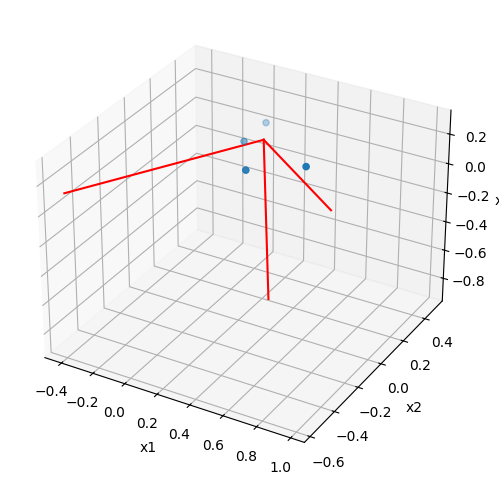

In [9]:
""" Plot of data and PC modes"""

fig = plt.figure(figsize=(6,6))

ax = plt.axes(projection='3d')
ax.scatter(Delta.T[0],Delta.T[1],Delta.T[2], marker='o')

plt1 = PCAs_vects_sklearn
mean_x1 = np.mean(Delta[0])
mean_x2 = np.mean(Delta[1])
mean_x3 = np.mean(Delta[2])

for i in range(3):
    ax.plot([plt1[0][i] + mean_x1, mean_x1],[plt1[1][i] + mean_x2, mean_x2],[plt1[2][i] + mean_x3, mean_x3], color = "r")
    
del plt1

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.show()